In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
from utils import load_image, add_noise, plot_image
import models

Using cache found in /Users/seanduffy/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


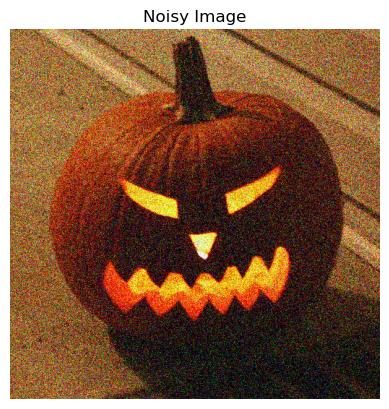

In [2]:
# Load and add noise
image_path = 'data/jack-o-lantern.jpg'
clean_image = load_image(image_path, target_size=(512, 512), tensor=True)
noisy_image = add_noise(clean_image, noise_factor=0.2).unsqueeze(0).to(device)
plot_image(noisy_image, title='Noisy Image')

# Random noise input to the network
input_noise = torch.randn_like(noisy_image).to(device)

In [3]:
model = models.unet.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_function = nn.MSELoss()

Epoch [0/1000] Loss: 0.051129


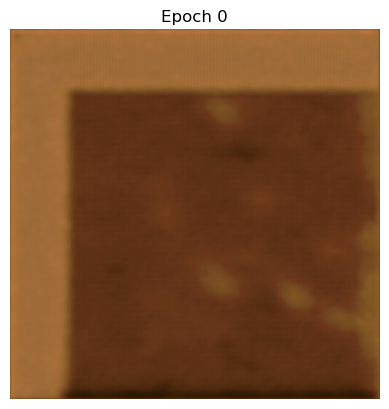

Epoch [10/1000] Loss: 0.039621


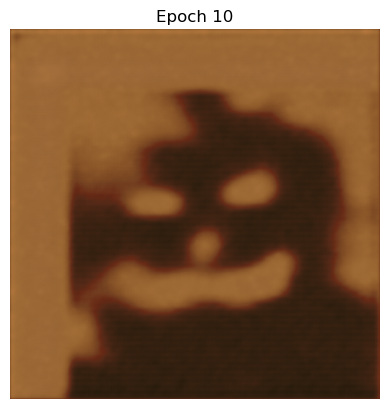

Epoch [20/1000] Loss: 0.036763


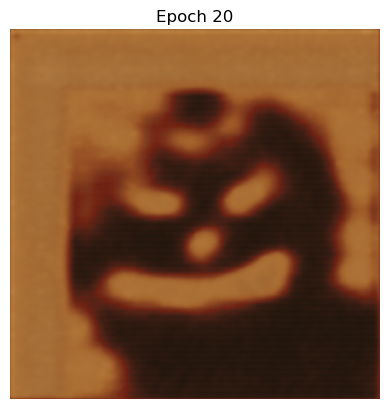

Epoch [30/1000] Loss: 0.035839


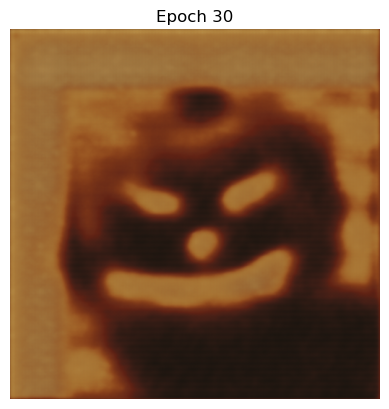

Epoch [40/1000] Loss: 0.034891


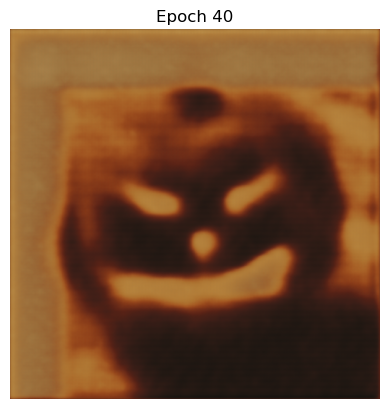

Epoch [50/1000] Loss: 0.034131


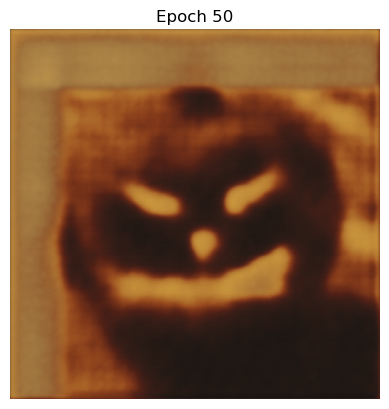

Epoch [60/1000] Loss: 0.033292


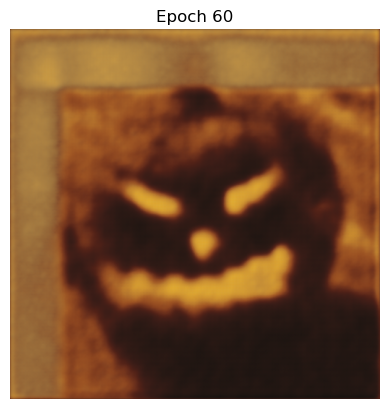

Epoch [70/1000] Loss: 0.031833


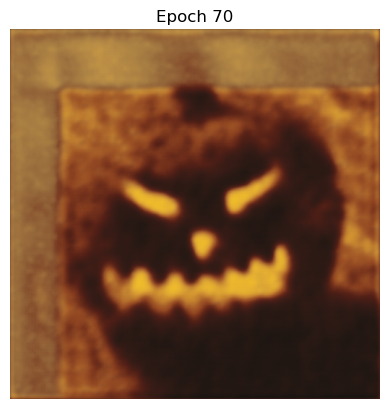

Epoch [80/1000] Loss: 0.030858


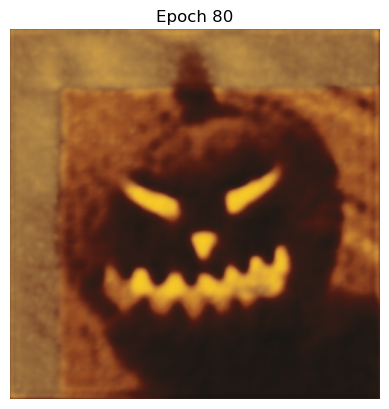

Epoch [90/1000] Loss: 0.030241


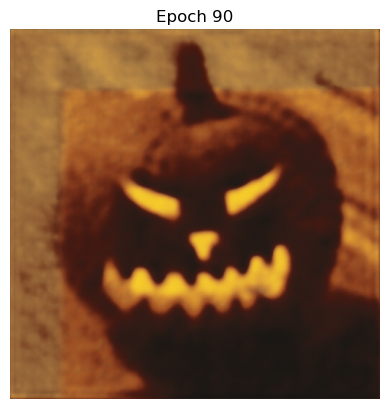

Epoch [100/1000] Loss: 0.029823


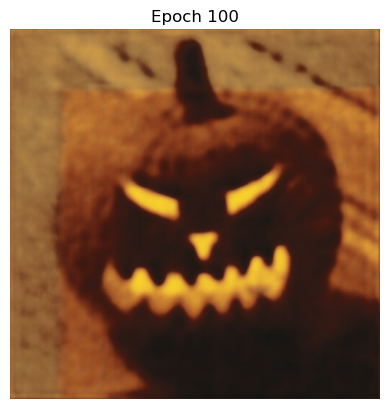

Epoch [110/1000] Loss: 0.029520


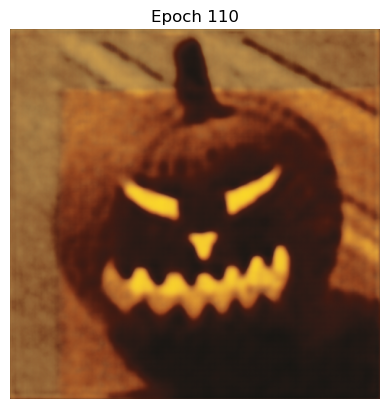

Epoch [120/1000] Loss: 0.029328


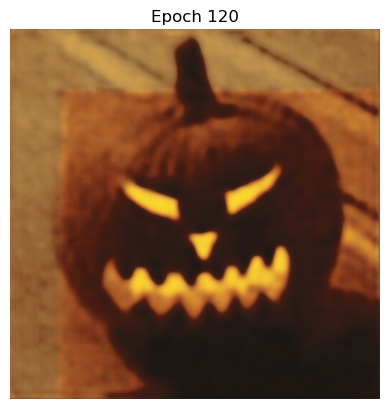

Epoch [130/1000] Loss: 0.028969


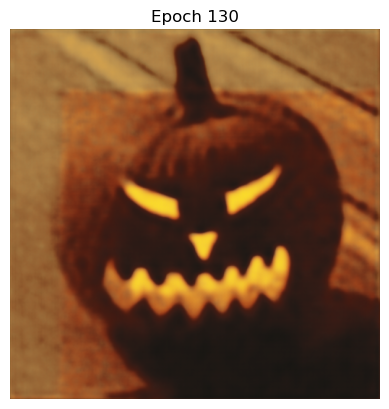

Epoch [140/1000] Loss: 0.028942


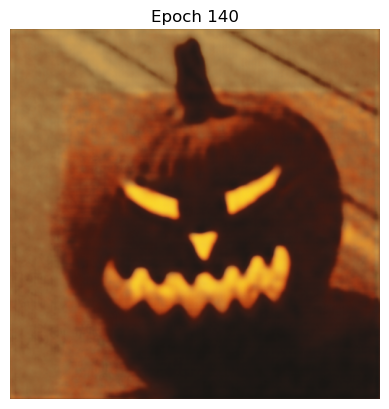

Epoch [150/1000] Loss: 0.028303


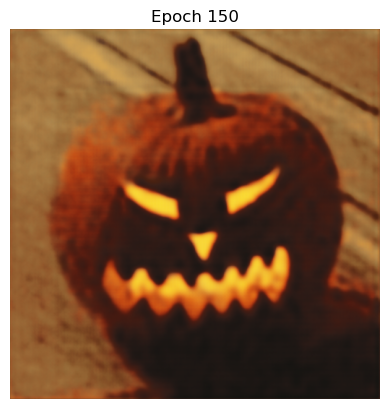

Epoch [160/1000] Loss: 0.028009


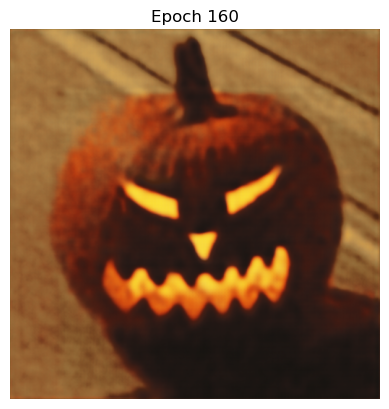

Epoch [170/1000] Loss: 0.027738


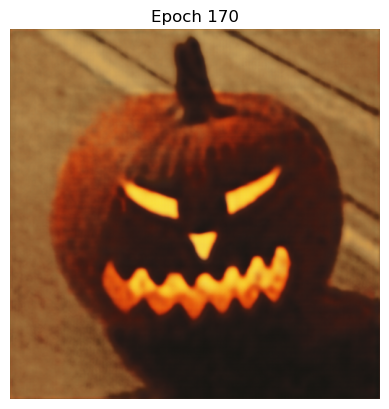

Epoch [180/1000] Loss: 0.027582


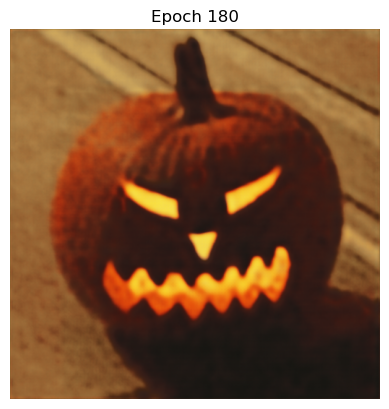

Epoch [190/1000] Loss: 0.027700


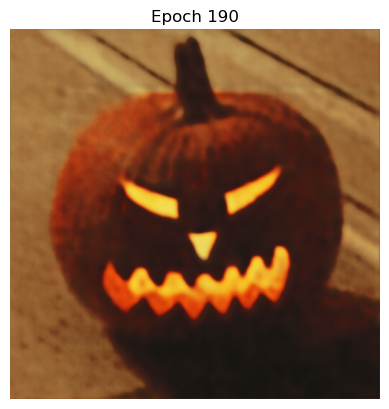

Epoch [200/1000] Loss: 0.027444


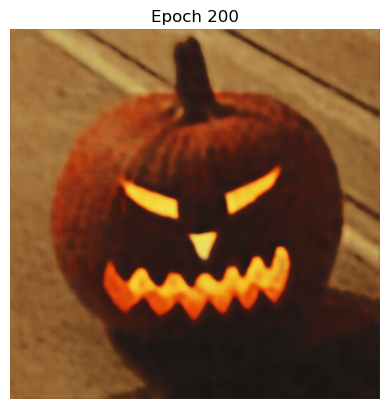

Epoch [210/1000] Loss: 0.027339


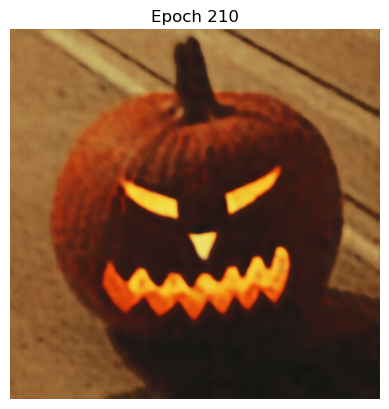

Epoch [220/1000] Loss: 0.027517


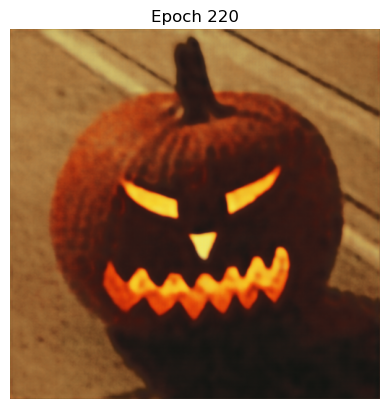

KeyboardInterrupt: 

In [6]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(input_noise)

    loss = loss_function(output, noisy_image)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch [{epoch}/{epochs}] Loss: {loss.item():.6f}")
        with torch.no_grad():
            output_image = output
            plot_image(output_image, title=f"Epoch {epoch}")
